In [22]:
import pandas as pd
import numpy as np

https://www.uberchord.com/blog/learn-how-to-read-guitar-chord-chart-symbols/

In [23]:
df=pd.read_pickle("/Users/eshantarneja/Documents/DataScience/data/cleanData/cleanData.pkl")
df.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup
0,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, ...","[G, C, D]",Its All Wrong But Its All Right,Dolly Parton,"(Country,)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, D, G)"
1,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am,...","[Am, C, G]",Jolene,Dolly Parton,"(Country, Folk)",1970,intermediate,E A D G B E,4th fret,NaN,NaN,3,"(Am, C, G)"
2,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, ...","[Em, G, D]",Jolene,Dolly Parton,"(Country,)",1970,novice,E A D G B E,4th fret,NaN,NaN,3,"(D, Em, G)"
3,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, ...","[Dm, F, C]",Jolene,Dolly Parton,"(Country, Folk)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, Dm, F)"
4,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em,...","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)"


In [24]:
type(df.loc[0,'chordOrder'])

list

# Convert to number system

Step 1: Clean up chords

Step 2: Get Key

Step 3: Add in numerical index

In [25]:
import re
def clean_chords(chords):
    """
    This function takes in a comma-separated string of 
    chords and cleans it by removing any base note variations, or
    other chord embelishments.  Diminished labels are kept as these
    are used in the chord progression table. The purpose of this
    is to clean the chords to match the labels within the chord
    progression table.
    
    returns:
        new_chords - array of newly cleaned chords to be tabulated
                        by the chord progression table
    """
    
    chords=','.join(chords)
    
    # Pattern grouping: 1=(chord pitch) 2=(base note) 3=(chord type) 4=(base note)
    pattern = "^([A-G]+)(\/[A-G]*[b#])*([(?m)|(?m\d)|(?b\d)|(?#\d)|(?maj\d)|\
    (?add\d)|(?sus\d)|(?aug)|(?aug\d)|(?dim)|(?dim\d)]*)(\/[A-G]*[b#])*"        
    prog = re.compile(pattern)

    pattern2 = "^([A-G])([b#])?(m$|m\d$)?(dim$|dim\d$)?"
    prog2 = re.compile(pattern2)

    chords = chords.split(',')
#     filter out missing chords
    chords = list(filter(None, chords))
    new_chords = [""]*len(chords)
    for i in range(len(chords)):
        try:
            curr_chord = chords[i]
#           fix for parentheses
            curr_chord= re.sub('[()]', '', curr_chord)
#   fix for H chords (they are used in Europe apparently, equivalent to b chords in US)
            curr_chord = re.sub('[H]','B', curr_chord)
            groups = prog.findall(curr_chord)[0] 
            no_base = groups[0] + groups[2]
            no_num = re.sub(pattern="\d", repl="", string=no_base)
            groups = prog2.findall(no_num)[0]
            note,accidental = fix_accidental(groups[0], groups[1])
            new_chords[i] = note + accidental + groups[2] + groups[3]
        except Exception as e:
            print("exception")
            print("curr chord: ", curr_chord)
            print(groups)
            print('-------')

        
    return(new_chords)

def fix_accidental(note, accidental):
    notes = np.asarray(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    note_idx = int(np.where(notes == note)[0])
    if accidental == '#':
        # Account for B# or E#
        if note == 'B':
            return('C', '')
        elif note == 'E':
            return('F', '')
        return(note,accidental)
    elif accidental == 'b':
        # Account for Cb or Fb
        if note == 'C':
            return('B', '')
        elif note == 'F':
            return('E', '')
        return(notes[note_idx - 1],'#')
    else:
        return(note, accidental)
            
df['cleanChordOrder']=df.chordOrder.apply(clean_chords)
df['cleanUniqueChords']=df.cleanChordOrder.apply(lambda x: list(set(x)))
df.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords
0,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, ...","[G, C, D]",Its All Wrong But Its All Right,Dolly Parton,"(Country,)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, D, G)","[G, C, G, C, D, G, C, G, C, D, G, C, G, C, D, ...","[C, D, G]"
1,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am,...","[Am, C, G]",Jolene,Dolly Parton,"(Country, Folk)",1970,intermediate,E A D G B E,4th fret,NaN,NaN,3,"(Am, C, G)","[Am, C, G, Am, G, Am, Am, C, G, Am, G, Am, Am,...","[Am, C, G]"
2,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, ...","[Em, G, D]",Jolene,Dolly Parton,"(Country,)",1970,novice,E A D G B E,4th fret,NaN,NaN,3,"(D, Em, G)","[Em, G, D, Em, D, Em, Em, G, D, Em, Em, G, D, ...","[D, Em, G]"
3,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, ...","[Dm, F, C]",Jolene,Dolly Parton,"(Country, Folk)",1970,NaN,NaN,NaN,NaN,NaN,3,"(C, Dm, F)","[Dm, F, C, Dm, C, Dm, F, C, Dm, C, Dm, Dm, F, ...","[F, Dm, C]"
4,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em,...","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)","[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em,...","[Am, Em, C, G]"


In [26]:
ChordList=df.cleanUniqueChords.sum()
((pd.Series(ChordList).value_counts().sort_values(ascending=False)/len(df))* 100).head(100).plot(kind='bar', title='Percent of Songs That Have Chord X')

In [27]:
pd.Series(ChordList).value_counts()

G        6885
C        6174
D        5857
A        4559
F        4069
Am       4060
Em       3952
E        3471
Bm       2395
B        2315
Dm       2130
A#       1923
F#m      1561
F#       1415
G#       1200
D#       1180
C#m      1092
Gm       1083
C#       1020
Cm        785
Fm        664
G#m       644
A#m       427
D#m       392
Fdim       42
G#dim      41
Bdim       37
Gdim       36
F#dim      35
C#dim      34
D#dim      33
Adim       33
Edim       32
Cdim       32
A#dim      31
Ddim       30
dtype: int64

Notes for finding key:

Check commonalities between chords you know are in song and the key

Some times there are ties
tricks for ties

1) 7th chord always has to be 5th chord
2) diminished is a dead give away for chord
3) most popular chord is often the key (not always though)
4) first chords is often the key

https://www.youtube.com/watch?v=Pg-zZEdNg3c&t=63s&ab_channel=SeanDaniel

In [28]:
chordDic= {'A': ['A', 'Bm', 'C#m', 'D', 'E', 'F#', 'G#dim'],
 'Am': ['Am', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'],
 'B': ['B', 'C#m', 'D#m', 'E', 'F#', 'G#m', 'A#dim'],
 'C': ['C', 'Dm', 'Em', 'F', 'G', 'Am', 'Bdim'],

 'D': ['D', 'Em', 'F#m', 'G', 'A', 'Bm', 'C#dim'],
 'E': ['E', 'F#m', 'G#m', 'A', 'B', 'C#m', 'D#dim'],
 'Em': ['Em', 'F#dim', 'G', 'Am', 'Bm', 'C', 'D'],
 'F': ['F', 'Gm', 'Am', 'Bb', 'C', 'Dm', 'Edim'],
 'G': ['G', 'Am', 'Bm', 'C', 'D', 'Em', 'F#dim']}

#  'Am': ['Am', 'Bdim', 'C', 'Dm', 'Em', 'F', 'G'],
#  'Em': ['Em', 'F#dim', 'G', 'Am', 'Bm', 'C', 'D'],
def findKey(chords):
    keyMax=0
    keys=[]
    finalKey="N/A"
    match=""
    for key, value in chordDic.items():  
        intersect=len(set(chords).intersection(set(value)))
        if intersect>keyMax:
            keys=[key]
            keyMax=intersect
        elif intersect==keyMax and keyMax>0:
            keys.append(key)
    # tiebreaker
    if len(keys)>1:
        maxChord= str(pd.Series(chords).value_counts().sort_values(ascending=False).head(1).index[0])
        firstChord=chords[0]
        lastChord=chords[-1]
        if maxChord in keys:
            finalKey=maxChord
            match="maxChord"
        elif firstChord in keys:
            finalKey=firstChord
            match="firstChord"
        elif lastChord in keys:
            finalKey=lastChord
            match="lastChord"
        else:
            match="tiebreak failed"
            finalKey=keys[0]
    elif len(keys)==1:
        finalKey=keys[0]
        match="one choice"
    else:
        match="no matches"
    return pd.Series([finalKey, keys, match])

dfKeys=df[df.key.notnull()]
dfKeys[['finalKey', 'keyChoices','match']]=dfKeys.cleanChordOrder.apply(lambda x: findKey(x))
dfKeys['keyCheck']=dfKeys[['key','finalKey']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)
missDf=dfKeys[dfKeys['keyCheck']==0]
matchDf=dfKeys[dfKeys['keyCheck']==1]
dfKeys.keyCheck.value_counts(normalize=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    0.620773
1    0.379227
Name: keyCheck, dtype: float64

In [29]:
missDf.key.value_counts()
# missDf.match.value_counts()
# missDf.groupby('key')['match'].apply(lambda x: list(x))
# missDf[missDf['match']=='one choice']
# missDf.fill_null("none").match.value_counts()

Dm     56
E      54
A      52
C      50
Bm     46
Cm     40
F      39
G      37
D      37
F#m    36
Bb     35
Ab     34
Eb     32
Em     29
Gm     28
Am     28
C#m    21
Bbm    18
Fm     16
G#m    16
B      13
Db     12
C#     11
Ebm     9
D#m     8
Gb      5
Abm     4
A#m     3
F#      2
Name: key, dtype: int64

In [30]:
missDf[missDf['key']=='Am']

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords,finalKey,keyChoices,match,keyCheck
710,https://tabs.ultimate-guitar.com/tab/ed-sheera...,"[G#m7, E, B5, Bmaj7, G#m7, E, B5, B7+, G#m7, E...","[G#m7, E, B5, Bmaj7, B7+, C#m, B, F#, G#m]",Give Me Love,Ed Sheeran,"(Folk,)",2010,novice,E A D G B E,2nd fret,Am,NaN,9,"(B, B5, B7+, Bmaj7, C#m, E, F#, G#m, G#m7)","[G#m, E, B, B, G#m, E, B, B, G#m, E, B, B, G#m...","[B, C#m, G#m, E, F#]",B,[B],one choice,0
714,https://tabs.ultimate-guitar.com/tab/ed-sheera...,"[Am7, F, C, Am7, F, C, Am7, F, C, Am7, F, C, A...","[Am7, F, C]",Happier,Ed Sheeran,"(Folk,)",2010,novice,E A D G B E,NaN,Am,NaN,3,"(Am7, C, F)","[Am, F, C, Am, F, C, Am, F, C, Am, F, C, Am, F...","[Am, C, F]",C,"[Am, C, F]",maxChord,0
853,https://tabs.ultimate-guitar.com/tab/edguy/hol...,"[Am, F/A, Dm, C, G, Am, F/A, G, E, Am, F/A, Dm...","[Am, F/A, Dm, C, G, E, Fmaj7, F, G6, Am7, Bbad...",Holy Shadows,Edguy,"(Metal,)",1990,intermediate,Eb Ab Db Gb Bb Eb,NaN,Am,"Chords to ""Holy Shadows"" by Edguy. Was this in...",16,"(Am, Am7, Bb, Bbadd11, C, C7, Csus4, Dm, E, Eb...","[Am, F, Dm, C, G, Am, F, G, E, Am, F, Dm, C, G...","[G, D#, Gm, C, E, A#, Am, Dm, F]",F,"[Am, C, F]",maxChord,0
937,https://tabs.ultimate-guitar.com/tab/electric-...,"[C, C/E, C/G, C9, C, Am, Fmaj7, F9, C/E, Em7, ...","[C, C/E, C/G, C9, Am, Fmaj7, F9, Em7, G, F#dim...",Evil Woman,Electric Light Orchestra,"(Pop,)",1970,intermediate,E A D G B E,NaN,Am,"Clearer formatting and alignment of chords, Ve...",13,"(Am, C, C/E, C/G, C9, D#m7, Dm7, Em7, Emadd9, ...","[C, C, C, C, C, Am, F, F, C, Em, G, F#dim, C, ...","[Em, G, D#m, Am, E, C, Dm, F, F#dim]",C,"[Am, C]",firstChord,0
1333,https://tabs.ultimate-guitar.com/tab/3182702,"[Am, Am7, Am, Am, Am, Gm, Am, Am, Am, Am, Gm, ...","[Am, Am7, Gm]",SchÃ¼ttel Deinen Speck,Peter Fox,"(Hip Hop,)",2000,novice,E A D G B E,NaN,Am,Tab eignet sich gut um das Lied z.B. mit einer...,3,"(Am, Am7, Gm)","[Am, Am, Am, Am, Am, Gm, Am, Am, Am, Am, Gm, A...","[Am, Gm]",F,[F],one choice,0
1468,https://tabs.ultimate-guitar.com/tab/a-great-b...,"[Am, F, C, Gsus4, Am, F, C, Gsus4, Am, F, C, G...","[Am, F, C, Gsus4, Em]",Say Something,A Great Big World,"(Rock,)",2010,novice,E A D G B E,2nd fret,Am,NaN,5,"(Am, C, Em, F, Gsus4)","[Am, F, C, G, Am, F, C, G, Am, F, C, G, Am, F,...","[Em, G, C, Am, F]",C,"[Am, C]",maxChord,0
1653,https://tabs.ultimate-guitar.com/tab/acdc/hell...,"[Am, D, C, D, C, G/B, G, D, C, G/B, Am, D, C, ...","[Am, D, C, G/B, G, E, A, B]",Hells Bells,AC/DC,"(Rock,)",1980,novice,E A D G B E,NaN,Am,NaN,8,"(A, Am, B, C, D, E, G, G/B)","[Am, D, C, D, C, G, G, D, C, G, Am, D, C, G, A...","[A, B, G, C, E, Am, D]",Em,"[Em, G]",tiebreak failed,0
2902,https://tabs.ultimate-guitar.com/tab/angra/reb...,"[Am, D/F#, G, Em, F, G, Am, Am, D/F#, G, Em, F...","[Am, D/F#, G, Em, F, Dm, Bb/D, C, G/B, Am7, Dm...",Rebirth,Angra,"(Metal,)",2000,intermediate,E A D G B E,NaN,Am,NaN,28,"(A, A7, Am, Am7, B, Bb/D, Bm, Bm/A, C, C#, C#m...","[Am, D, G, Em, F, G, Am, Am, D, G, Em, F, G, A...","[A, B, Em, G, D#, C#m, Bm, C, A#, E, F#, Am, D...",G,"[A, Am, C, Em, G]",maxChord,0
2979,https://tabs.ultimate-guitar.com/tab/anssi-kel...,"[Am, F, C, G/H, Am, F, C, G/B, Am, F, C, G/B, ...","[Am, F, C, G/B, F/A, C/A, G/A, Em, F/E, Bm, G,...",Puistossa,Anssi Kela,"(Folk, Rock)",2000,novice,E A D G B E,NaN,Am,The chords of Puistossa were not found on UG b...,14,"(A/C#, Am, Asus2/C#, Bm, C, C/A, D, Em, F, F/A...","[Am, F, C, G, Am, F, C, G, Am, F, C, G, Am, F,...","[A, Em, G, Bm, C, Am, D, F]",Em,"[Em, G]",lastChord,0
3701,https://tabs.ultimate-guitar.com/tab/babymetal...,"[Am, Em, F, G, Am, G, F, G, C, G, Am, C, F, C,...","[Am, Em, F, G, C, Dm, E, G#aug, D, Csus4, Bm7-...",No Rain No Rainbow,BABYMETAL,"(Metal,)",2010,intermediate,E A D G B E,NaN,Am,NaN,20,"(A, Ab, Am, Asus4, Bb, Bm, Bm7-5, C, Csus4, D,...","[Am, Em, F, G, Am, G, F, G, C, G, Am, C, F, C,...","[A, Em, G, F#m, Bm, D

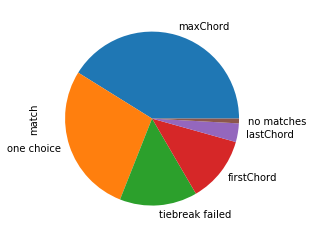

In [31]:
dfKeys.match.fillna("NA").value_counts().plot(kind='pie')

In [32]:
dfKeys.head()

,url,chordOrder,uniqueChords,song,artist,genre,decade,difficulty,tuning,capo,key,other,cardinality,uniqueChordsTup,cleanChordOrder,cleanUniqueChords,finalKey,keyChoices,match,keyCheck
4,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em,...","[Am, C, G, Em]",Jolene,Dolly Parton,"(Country, Folk)",1970,novice,E A D G B E,4th fret,C#m,NaN,4,"(Am, C, Em, G)","[Am, Am, C, G, Am, G, Am, Am, C, G, Am, G, Em,...","[Am, Em, C, G]",Am,"[Am, C, Em, G]",maxChord,0
11,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[G, D, A, D, D, A, A, G, D, D, D7, G, G, D, A,...","[G, D, A, D7, E, A7]",Mama Say A Prayer,Dolly Parton,"(Country,)",1960,novice,E A D G B E,NaN,D,Full tab including intro intro and instrumenta...,6,"(A, A7, D, D7, E, G)","[G, D, A, D, D, A, A, G, D, D, D, G, G, D, A, ...","[A, D, G, E]",D,"[A, D]",maxChord,1
16,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, ...","[E, A, D]",Poor Folks Town,Dolly Parton,"(Country,)",1980,novice,E A D G B E,NaN,E,For any level guitarist. The chords to this so...,3,"(A, D, E)","[E, A, D, A, E, A, D, A, E, A, D, A, E, D, A, ...","[A, D, E]",A,[A],one choice,0
17,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[D, C, Bm, A, D, A, D, D, D, G, A7, G, D, G, A...","[D, C, Bm, A, G, A7]",Randy,Dolly Parton,"(Country,)",1970,intermediate,E A D G B E,NaN,D,NaN,6,"(A, A7, Bm, C, D, G)","[D, C, Bm, A, D, A, D, D, D, G, A, G, D, G, A,...","[A, G, Bm, C, D]",D,"[D, Em, G]",maxChord,1
20,https://tabs.ultimate-guitar.com/tab/dolly-par...,"[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, ...","[A, G, D, E, G/F#, A#, G#, G#/G]",The Bridge,Dolly Parton,"(Country,)",1960,NaN,E A D G B E,4th fret,C#,NaN,8,"(A, A#, D, E, G, G#, G#/G, G/F#)","[A, G, A, G, A, D, E, A, A, G, A, G, A, A, G, ...","[A, G, G#, A#, E, D]",A,"[A, D]",maxChord,0


In [33]:
dfKeys['keyCheck']=dfKeys[['key','finalKey']].apply(lambda x: 1 if x[0]==x[1] else 0, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
dfKeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 4 to 9993
Data columns (total 20 columns):
url                  1242 non-null object
chordOrder           1242 non-null object
uniqueChords         1242 non-null object
song                 1242 non-null object
artist               1242 non-null object
genre                1242 non-null object
decade               1240 non-null object
difficulty           1049 non-null object
tuning               1207 non-null object
capo                 365 non-null object
key                  1242 non-null object
other                497 non-null object
cardinality          1242 non-null int64
uniqueChordsTup      1242 non-null object
cleanChordOrder      1242 non-null object
cleanUniqueChords    1242 non-null object
finalKey             1242 non-null object
keyChoices           1242 non-null object
match                1242 non-null object
keyCheck             1242 non-null int64
dtypes: int64(2), object(18)
memory usage: 203.8+ KB
